# Analysis performance on VAL set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

## GRU with max length 20, 3 layers

In [2]:
rnn3_20 = pd.read_csv('outputs/20181026_rnn3_fix.csv')
truth = rnn3_20['truth']
pred = rnn3_20['prediction']

In [3]:
print(classification_report(truth, pred, digits=4))

             precision    recall  f1-score   support

          0     0.9219    0.9751    0.9477     53554
          1     0.2077    0.0733    0.1083      4776

avg / total     0.8634    0.9012    0.8790     58330



In [4]:
print(confusion_matrix(truth,pred))
print(accuracy_score(truth, pred))

[[52219  1335]
 [ 4426   350]]
0.9012343562489286


## GRU with max length 20, 1 layers

In [5]:
rnn1_20 = pd.read_csv('outputs/20181026_rnn1_fix.csv')
truth = rnn1_20['truth']
pred = rnn1_20['prediction']

In [6]:
print(classification_report(truth, pred, digits=4))

             precision    recall  f1-score   support

          0     0.9213    0.9743    0.9471     53554
          1     0.1889    0.0670    0.0989      4776

avg / total     0.8614    0.9001    0.8776     58330



In [7]:
print(confusion_matrix(truth,pred))
print(accuracy_score(truth, pred))

[[52180  1374]
 [ 4456   320]]
0.900051431510372


### Based on average precision, 3 layers GRU preforms better than 1 layer

## GRU with max length 50, 3 layers

In [8]:
rnn3_50 = pd.read_csv('outputs/20181026_rnn3_50.csv')
truth = rnn3_50['truth']
pred = rnn3_50['prediction']

In [9]:
print(classification_report(truth, pred, digits=4))

             precision    recall  f1-score   support

          0     0.9237    0.9634    0.9431     53554
          1     0.2078    0.1076    0.1418      4776

avg / total     0.8651    0.8933    0.8775     58330



In [10]:
print(confusion_matrix(truth,pred))
print(accuracy_score(truth, pred))

[[51595  1959]
 [ 4262   514]]
0.8933481913252186


### Based on average precision, 3 layers GRU preforms better than 1 layer

## ROC curve, P-R curve

In [11]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

In [12]:
df = pd.read_csv('outputs/20181026_rnn3_50_auc.csv')
y_true_1 = df['truth'].values
y_true_0 = 1 - y_true_1
y_score = df[['0','1']].values

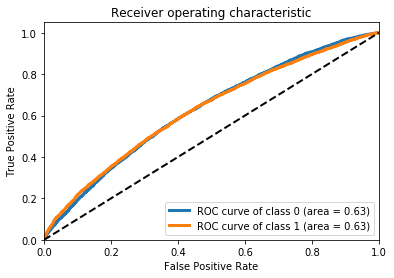

In [13]:
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr[0], tpr[0], _ = roc_curve(y_true_0, y_score[:, 0])
roc_auc[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(y_true_1, y_score[:, 1])
roc_auc[1] = auc(fpr[1], tpr[1])

plt.figure()
plt.plot(fpr[0], tpr[0], lw=3, label='ROC curve of class 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], lw=3, label='ROC curve of class 1 (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

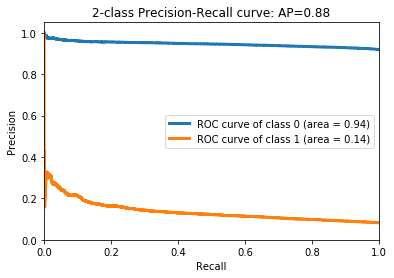

In [14]:
precision = dict()
recall = dict()
area = dict()

precision[0], recall[0], _ = precision_recall_curve(y_true_0, y_score[:, 0])
area[0] = auc(recall[0], precision[0])
precision[1], recall[1], _ = precision_recall_curve(y_true_1, y_score[:, 1])
area[1] = auc(recall[1], precision[1])

y_true_0 = y_true_0.reshape(-1,1)
y_true_1 = y_true_1.reshape(-1,1)
y_test = np.concatenate((y_true_0, y_true_1), axis=1)
average_precision = average_precision_score(y_test, y_score, average='weighted')

plt.figure()
plt.plot(recall[0], precision[0], lw=3, label='ROC curve of class 0 (area = %0.2f)' % area[0])
plt.plot(recall[1], precision[1], lw=3, label='ROC curve of class 1 (area = %0.2f)' % area[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend()
plt.show()